# Autoencoders

Type of neural network which typically aims to learn efficient representations (efficient coding) of the data.
Usually autoencoders are trained in an unsupervised manner.


### Applications
1. Anomaly detection
2. Dimensionality reduction
3. Denoising
4. ...

**Reconstruction**
![Autoencoder](https://lilianweng.github.io/lil-log/assets/images/autoencoder-architecture.png)
Source: https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html

**Denoising**
![denoising](https://miro.medium.com/max/5160/1*SxwRp9i23OM0Up4sEze1QQ@2x.png)
Source: https://www.kaggle.com/tarunkr/autoencoder-denoising-image-mnist-cifar10

Some more examples of autoencoders:
- [convolutional](https://medium.com/dataseries/convolutional-autoencoder-in-pytorch-on-mnist-dataset-d65145c132ac)
- [time series data](https://curiousily.com/posts/time-series-anomaly-detection-using-lstm-autoencoder-with-pytorch-in-python/)
- [tabular data](https://medium.com/@vkansal/credit-card-fraud-detection-using-deep-learning-pytorch-47f680a8c5be) [(code)](https://github.com/vimalkansal/credit_card_fraud_detection/blob/master/project/credit_card_fraud_detection.ipynb)

# Recapitulation

Import base libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Import PyTorch libraries

In [1]:
import torch
import torchvision

In [3]:
DATASETS_PATH = 'data' # path to directory where data are to be stored

In [4]:
transform = torchvision.transforms.Compose(
    [ torchvision.transforms.ToTensor(), #Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
      torchvision.transforms.Normalize((0.1307), (0.3081))])

In [5]:
mnist_train = torchvision.datasets.MNIST(root=DATASETS_PATH, train=True, download=True, transform=transform)
mnist_test = torchvision.datasets.MNIST(root=DATASETS_PATH, train=False, download=True, transform=transform);

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



<class 'torch.Tensor'> torch.Size([1, 28, 28])


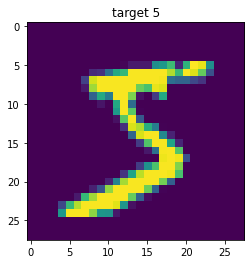

In [6]:
train_image, train_target = mnist_train[0]    #let us examine the 0-th sample
print(type(train_image), train_image.shape)
plt.imshow(train_image[0])
plt.title(f'target {train_target}');

In [7]:
class MLP(torch.nn.Module):
    def __init__(self): # initialize model, called at model = MLP(). In genereal you can pass arguments to initializer, e.g. number or size of hidden layers (not in this example)
        super().__init__()
        self.mlp = torch.nn.Sequential(   #Sequential is a structure which allows stacking layers one on another in such a way, 
                                          #that output from a preceding layer serves as input to the next layer 
            torch.nn.Flatten(),   #change the last three orders in data (with dimensions 1, 28 and 28 respectively) into one order of dimensions (1*28*28)
            torch.nn.Linear(1*28*28, 1024),  #which is used as INPUT to the first Linear layer
            torch.nn.Sigmoid(),
            # torch.nn.Linear(1024, 2048),   #IMPORTANT! Please observe, that the OUTPUT dimension of a preceding layer is always equal to the INPUT dimension of the next layer.
            # torch.nn.Sigmoid(),
            torch.nn.Linear(1024, 256),
            torch.nn.Sigmoid(),            #Sigmoid is a nonlinear function which is used in-between layers
            torch.nn.Linear(256, 10),
        )
    def forward(self, x): # run model, called at out = model(x)
        out = self.mlp(x)
        return out

In [8]:
batch_size = 256
mnist_train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
mnist_test_dataloader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

In [9]:
net = MLP()
optimizer = torch.optim.Adam(net.parameters(), 0.001)   #initial and fixed learning rate of 0.001. We will be using ADAM optimizer throughout the workshop
                                                        #different choices are possible, but this is outside the scope of this workshop

net.train()    #it notifies the network layers (especially batchnorm or dropout layers, which we don't use in this example) that we are doing traning
for epoch in range(5):  #  an epoch is a training run through the whole data set

    loss = 0.0
    for batch, data in enumerate(mnist_train_dataloader):
        batch_inputs, batch_labels = data
        #batch_inputs.squeeze(1)     #alternatively if not for a Flatten layer, squeeze() could be used to remove the second order of the tensor, the Channel, which is one-dimensional (this index can be equal to 0 only)
        
        optimizer.zero_grad()

        batch_outputs = net(batch_inputs)   #this line calls the forward(self, x) method of the MLP object. Please note, that the last layer of the MLP is linear 
                                            #and MLP doesn't apply 
                                            #the nonlinear activation after the last layer
        loss = torch.nn.functional.cross_entropy(batch_outputs, batch_labels, reduction = "mean") #instead, nonlinear softmax is applied internally in THIS loss function
        if (batch+1) % 50 == 0:
          print("epoch:", epoch, "batch:", batch+1, "current batch loss:", loss.item()) 
        loss.backward()       #this computes gradients as we have seen in previous workshops
        optimizer.step()     #but this line in fact updates our neural network. 
                                ####You can experiment - comment this line and check, that the loss DOES NOT improve, meaning that the network doesn't update

epoch: 0 batch: 50 current batch loss: 0.5599387288093567
epoch: 0 batch: 100 current batch loss: 0.47236254811286926
epoch: 0 batch: 150 current batch loss: 0.2601375877857208
epoch: 0 batch: 200 current batch loss: 0.2614389955997467
epoch: 1 batch: 50 current batch loss: 0.19827869534492493
epoch: 1 batch: 100 current batch loss: 0.1217009648680687
epoch: 1 batch: 150 current batch loss: 0.23075400292873383
epoch: 1 batch: 200 current batch loss: 0.07347504049539566
epoch: 2 batch: 50 current batch loss: 0.1745084971189499
epoch: 2 batch: 100 current batch loss: 0.10914839059114456
epoch: 2 batch: 150 current batch loss: 0.0784570574760437
epoch: 2 batch: 200 current batch loss: 0.09012021124362946
epoch: 3 batch: 50 current batch loss: 0.03355329483747482
epoch: 3 batch: 100 current batch loss: 0.050205864012241364
epoch: 3 batch: 150 current batch loss: 0.09747115522623062
epoch: 3 batch: 200 current batch loss: 0.062310535460710526
epoch: 4 batch: 50 current batch loss: 0.0497611

# GPU computing

In [10]:
t =torch.tensor([1.3, 4.5])
print(t)
print(t.device)

tensor([1.3000, 4.5000])
cpu


check if CUDA (GPU) is available

In [11]:
torch.cuda.is_available()

True

In case you get `False` do the following steps:
1. In Colab panel: Runtime -> Change runtime type
2. Set "Hardware accelerator" to "GPU", click "Save"
3. You get new runtime, all variables and imports are cleared - please run cells above (without training)
4. check again `torch.cuda.is_available()`


You can set device for computation for tensors and torch modules (e.g. models)

In [14]:
t =torch.tensor([1.3, 4.5])
print(t.dtype, t.device)
t_cuda = t.to('cuda'); #equivalent to t.cuda()
print(t.dtype, t.device, 'Tensor still on cpu')
print(t_cuda.dtype, t_cuda.device, 'Tensor on gpu')

torch.float32 cpu
torch.float32 cpu Tensor still on cpu
torch.float32 cuda:0 Tensor on gpu


Let's create sample model and input for the model

In [15]:
model = MLP()
model_input = torch.rand(1,1,28,28)

By dafault, all instances are created for cpu calculations

In [16]:
out = model(model_input)

Model can be transferred to gpu in this way:

In [17]:
model.to('cuda')

MLP(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=1024, bias=True)
    (2): Sigmoid()
    (3): Linear(in_features=1024, out_features=256, bias=True)
    (4): Sigmoid()
    (5): Linear(in_features=256, out_features=10, bias=True)
  )
)

Now it will work with 'gpu' input, but fail for 'cpu'

In [30]:
# this will fail, uncomment to check
#out = model(model_input)

In [19]:
out = model(model_input.to('cuda'))

The output is also located on gpu

In [20]:
print(out.device)

cuda:0


What you will usually do to avoid problems with not compatible device, is setting `device` variable and applying it to models, inputs and any other tensors you are using

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # if your machine supports cuda, it wil be used for computation
model.to(device)
input = torch.rand(2, 28*28)
output = model(input.to(device))
print('output device:', output.device)

output device cuda:0


If you need convert the output to nupy, there are two more steps:
1. `output.detach()` will create the copy of tensor, detached from the current graph
2. `output.detach().to('cpu')` or `output.detach().cpu()` will move the tensor to cpu.
3. Now the output may be transformed to numpy: `output.detach().cpu().numpy()`

In [28]:
numpy_out = output.detach().cpu().numpy()
print(type(numpy_out))

<class 'numpy.ndarray'>


Caution! PyTorch modules (e.g. models) do not have 'device' attribute. Only tensors have. What is happening under the hood when you set model.to('device') is propagation of device selection to weight tensors

In [29]:
# this will fail, uncomment to check
# model.device

# Autoencoders

## Data

First, let's have a look on the data. They are MNIST dataset - the same as last week.

This time images are not normalized

In [31]:
from torchvision.datasets import MNIST
from torchvision import  transforms

In [32]:
transform = transforms.ToTensor()

In [33]:
mnist_train = MNIST(DATASETS_PATH, train=True, download=True, transform=transform);
mnist_test = MNIST(DATASETS_PATH, train=False, download=True, transform=transform);

Let's see what the data look like

In [34]:
img, target = mnist_train[0]
print(f'image type: {type(img)}, image shape: {img.shape}, target: {target}, target class name: {mnist_train.classes[target]}')

image type: <class 'torch.Tensor'>, image shape: torch.Size([1, 28, 28]), target: 5, target class name: 5 - five


The image is a torch.Tensor object, and the target an integer. Notice that the image has 3 dimensions: single channel and 28 height x 28 width \
In order to visualize it correctly, we need to reduce it to 2 dimensional  height x width tensor

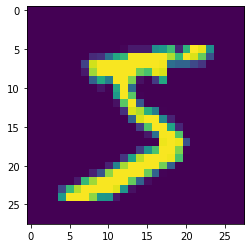

In [35]:
plt.imshow(img[0])

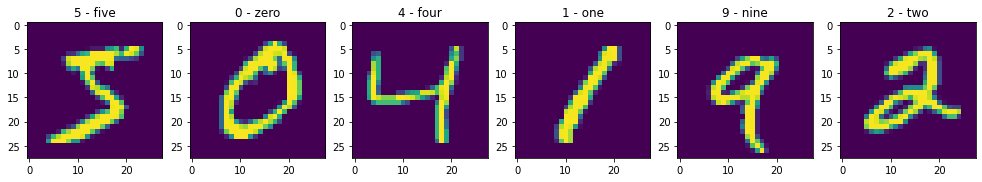

In [36]:
num_images = 6
fig, axs = plt.subplots(ncols=num_images, figsize=(17,5))
for i in range(num_images):
    img, target = mnist_train[i]
    axs[i].imshow(img[0])
    axs[i].set_title(f'{mnist_train.classes[target]}')
    
    

## Model

In [37]:
import torch
from torch import nn

### Encoder

#### Your task: write encoder class with single hidden layer

Let's start with fully-connected model, i. e. perceptron.
1. As the input, model should take batch of 1d vectors with of 28x28 length (number of pixels)
2. Number of neurons in hidden layer should be an argument of constructor (`__init__` function)
3. The same applies to the number of latent space dimesions 

In [38]:
class Encoder_1hl(nn.Module):
    def __init__(self, hidden_dim, latent_dim):
        """
        hidden_dim: number of neurons in the hidden layer
        latent_dim: number of latent space dimensions
        """
        super().__init__()
        #your code here
        ...
        

    def forward(self, x):
        #your code here
        ...
        return ...

Solution:

In [39]:
class Encoder_1hl(nn.Module):
    def __init__(self, hidden_dim, latent_dim):
        """
        hidden_dim: number of neurons in the hidden layer
        latent_dim: number of latent space dimensions
        """
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(28*28, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim),
            )

    def forward(self, x):
        x = self.net(x)
        return x

Try if it works:

In [40]:
#prepare data
img, target = mnist_train[0]
img = img.view(-1)
print('image shape:', img.shape)

image shape: torch.Size([784])


In [41]:
# prepare encoder
hidden_dim = 64
latent_dim = 12
encoder = Encoder_1hl(hidden_dim, latent_dim)

In [42]:
# compute representation in latent space
batch = img.unsqueeze(0) #model operates on batched input. Let's create batch with one sample
print('batch shape:', batch.shape)
with torch.no_grad(): #turn off gradient
    z = encoder(batch)
print('output shape:', z.shape)

batch shape: torch.Size([1, 784])
output shape: torch.Size([1, 12])


### Decoder

In [43]:
class Decoder_1hl(nn.Module):
    def __init__(self, hidden_dim, latent_dim):
        """
        hidden_dim: number of neurons in the hidden layer
        latent_dim: number of latent space dimensions
        """
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 28*28),
            nn.Sigmoid() # sigmoid function transforms input values (-inf, +inf) to output in range (0, 1)
            )
            

    def forward(self, x):
        x = self.net(x)
        return x

### Autoencoder = Encoder + Decoder

Let's put it all together.

#### Your task: write autoencoder class

Encoder and decoder should have 1 hidden layer each

In [ ]:
class Autoencoder_1hl(nn.Module):
    def __init__(self, hidden_dim, latent_dim):
        """
        hidden_dim: number of neurons in the hidden layer
        latent_dim: number of latent space dimensions
        """
        super().__init__()
        # your code here
        ...
            
    def forward(self, x):
        # your code here
        ...
        return ...

Solution

In [44]:
class Autoencoder_1hl(nn.Module):
    def __init__(self, hidden_dim, latent_dim):
        """
        hidden_dim: number of neurons in the hidden layer
        latent_dim: number of latent space dimensions
        """
        super().__init__()
        # your code here
        self.encoder = Encoder_1hl(hidden_dim, latent_dim)
        self.decoder = Decoder_1hl(hidden_dim, latent_dim)
            
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x) 
        return x

In [45]:
autoencoder = Autoencoder_1hl(hidden_dim, latent_dim)

In [46]:
batch = img.unsqueeze(0) #model operates on batched input. Let's create batch with one sample
print('batch shape:', batch.shape)
with torch.no_grad(): #turn off gradient
    x_hat = autoencoder(batch)
print('output shape:', x_hat.shape)

batch shape: torch.Size([1, 784])
output shape: torch.Size([1, 784])


So far, the model operates on flatten images. Yet everywhere else we prefer to operate on 1x28x28 images. Let's modify the `forward` function to do the reshaping

In [ ]:
class Autoencoder_1hl(nn.Module):
    
    # paste your __init__ function here

    def forward(self, x):
        input_shape = x.shape #batch_size, channels, height, width
        x = x.view(input_shape[0], -1)
        
        # paste the rest of your forward function here
        
        return x.view(input_shape)


Solution:

In [49]:
class Autoencoder_1hl(nn.Module):
    def __init__(self, hidden_dim, latent_dim):
        """
        hidden_dim: number of neurons in the hidden layer
        latent_dim: number of latent space dimensions
        """
        super().__init__()
        # your code here
        self.encoder = Encoder_1hl(hidden_dim, latent_dim)
        self.decoder = Decoder_1hl(hidden_dim, latent_dim)
            
    def forward(self, x):
        input_shape = x.shape #batch_size, channels, height, width
        x = x.reshape(input_shape[0], -1)
        x = self.encoder(x)
        x = self.decoder(x) 
        return x.reshape(input_shape)

Try the new model

In [105]:
img, target = mnist_train[0]
batch = img.unsqueeze(0) #model operates on batched input. Let's create batch with one sample
print('batch shape:', batch.shape)
autoencoder = Autoencoder_1hl(hidden_dim, latent_dim)
with torch.no_grad(): #turn off gradient
    x_hat = autoencoder(batch)
print('output shape:', x_hat.shape)

batch shape: torch.Size([1, 1, 28, 28])
output shape: torch.Size([1, 1, 28, 28])


#### Visualize

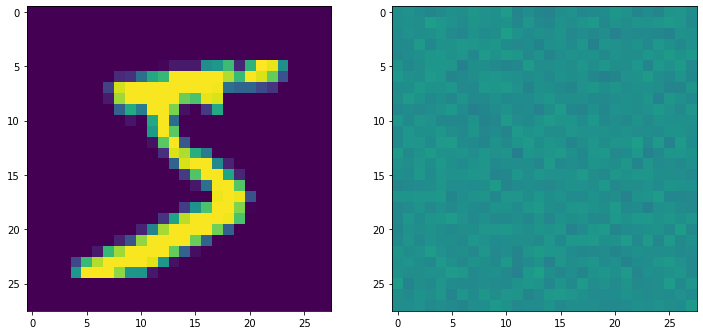

In [106]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
ax1.imshow(batch[0,0], vmin=0, vmax=1)
ax2.imshow(x_hat[0,0], vmin=0, vmax=1)

## Training

Prepare dataloaders

In [52]:
from torch.utils.data import DataLoader

In [53]:
batch_size = 128

In [124]:
mnist_train_dataloader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True) #num workers: number of threads used by dataloader,  `pin_memory=True`: use nvida acceleration in data loading. Use it almost always: https://discuss.pytorch.org/t/when-to-set-pin-memory-to-true/19723/2
mnist_test_dataloader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

Closer look on dataloaders

In [55]:
x, y = next(iter(mnist_train_dataloader))
print(f'x shape: {x.shape}')
print(f'target shape: {y.shape}')
print(f'target: {y}')

x shape: torch.Size([128, 1, 28, 28])
target shape: torch.Size([128])
target: tensor([7, 2, 9, 5, 0, 2, 3, 9, 5, 7, 1, 8, 7, 4, 8, 1, 7, 0, 1, 4, 8, 0, 5, 5,
        3, 9, 6, 0, 6, 7, 2, 3, 0, 4, 9, 3, 2, 2, 4, 8, 7, 8, 0, 4, 6, 2, 7, 6,
        4, 7, 0, 5, 3, 8, 8, 8, 7, 7, 3, 9, 0, 0, 9, 8, 6, 8, 0, 6, 2, 6, 8, 6,
        7, 2, 8, 8, 6, 8, 8, 7, 1, 9, 8, 8, 6, 1, 8, 3, 9, 8, 7, 8, 3, 4, 7, 9,
        2, 4, 1, 0, 9, 5, 4, 9, 7, 7, 2, 4, 3, 2, 7, 8, 3, 0, 0, 7, 6, 1, 3, 2,
        4, 8, 5, 5, 8, 2, 1, 1])


### Schema of training in PyTorch

Set model, optimizer (which performs optimizing steps) and criterion
```
model = ...
optimizer =  torch.optim.AdamW(model.parameters(), lr=1e-3)
criterion = ... #function which computes loss
```

Set device on which computations will be done: 'cpu' or 'cuda' (GPU)
```
device = 'cuda' if torch.cuda.is_available() else 'cpu' # if your machine supports cuda, it wil be used for computation
```

set model to 'train' mode and allocate it to the device
```
model.train().to(device);
```

Schema for single epoch training:
```
for x, y in mnist_train_dataloader:    
    # clear gradient from previous step
    optimizer.zero_grad()
    
    x = x.to(device)
    x_hat = model(x)
    loss = criterion(x, x_hat)

    # compute accumulated gradients
    loss.backward()

    # perform parameter update based on current gradients
    optimizer.step()
 ```

#### Your task
write training loop for 10 epochs for autoencoder. Set criterion to mean square root error `nn.MSELoss()`

In [56]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # if your machine supports cuda, it wil be used for computation
print(f'device: {device}')
autoencoder.to(device).train();
optimizer = torch.optim.AdamW(autoencoder.parameters(), lr=1e-3)
criterion = nn.MSELoss() #the same as nn.functional.mse_loss

device: cuda


Check batches from dataloader

In [58]:
x, y = next(iter(mnist_train_dataloader))

# # equivalent to
# for x, y in mnist_train_dataloader:
#   break

print('x:', x.shape)

x: torch.Size([128, 1, 28, 28])


Check x_hat computation step

In [59]:
x_hat = autoencoder(x.to(device))

Check loss computation

In [60]:
loss = criterion(x.to(device), x_hat) # note, that x_hat is already at `device`

Now, write the training loop:

In [63]:
num_epochs = 2 #first let's do a short training, to see if the loss go down

history = [] #save losses from each epoch
for i_epoch in range(num_epochs):
    epoch_losses = []
    
    # your code here
    # ...
    # epoch_loss = ...
    
    print(f'epoch {i_epoch}, loss: {epoch_loss:0.4f}')
    history.append({'loss': epoch_loss})

TypeError: ignored

Solution:

In [64]:
num_epochs = 2

history = [] #save losses from each epoch
for i_epoch in range(num_epochs):
    epoch_losses = []
    for batch in mnist_train_dataloader:
         # clear gradient from previous step
        optimizer.zero_grad()
        
        x, y = batch
        x = x.to(device)
        x_hat = autoencoder(x)
        loss = criterion(x, x_hat)
        
        # compute accumulated gradients
        loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # save loss
        epoch_losses.append(loss.item()) #'item()' gets number from tensor. Similarly 'numpy()' returns numpy array copy of the tensor
        
        
    epoch_loss = np.mean(epoch_losses)
    print(f'epoch {i_epoch}, loss: {epoch_loss:0.4f}')
    history.append({'loss': epoch_loss})
        

epoch 0, loss: 0.0587
epoch 1, loss: 0.0303


Having small loss on training is good, but we really want the model to generalize for unseen samples. Let's calculate loss on test dataset after each epoch

#### Your task
Write function which calculates loss of the model on test dataset

In [ ]:
@torch.no_grad() #this decorator disable gradient computation in function. Equivalent to `with torch.no_grad():` inside function. Makes code clearer
def evaluate_model(model, dataloader, criterion):
    # your code here
    # ...
    # final_loss = ...
    return final_loss

In [65]:
@torch.no_grad()
def evaluate_model(model, dataloader, criterion):
    losses = []
    model = model.eval()
    for batch in dataloader:  
        x, y = batch
        x = x.to(device)
        x_hat = autoencoder(x)
        loss = criterion(x, x_hat)
        losses.append(loss.item())
    final_loss = np.mean(losses)
    return final_loss

Test if your function works

In [66]:
test_loss = evaluate_model(autoencoder, mnist_test_dataloader, criterion)
print(f'test loss: {test_loss:0.4f}')

test loss: 0.0261


Now we are ready to implement testset evaluation and do the proper traing of the model. For clarity, let's create a fresh autoencoder

In [125]:
hidden_dim = 64
latent_dim = 12
autoencoder = Autoencoder_1hl(hidden_dim, latent_dim)
autoencoder.to(device).train();

optimizer = torch.optim.AdamW(autoencoder.parameters(), lr=1e-3)

In [126]:
num_epochs = 10 #train longer for better representations

history = [] #save losses from each epoch
for i_epoch in range(num_epochs):
    epoch_losses = []
    for batch in mnist_train_dataloader:
         # clear gradient from previous step
        optimizer.zero_grad()
        
        x, y = batch
        x = x.to(device)
        x_hat = autoencoder(x)
        loss = criterion(x, x_hat)
        
        # compute accumulated gradients
        loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # save loss
        epoch_losses.append(loss.item()) #'item()' gets number from tensor. Similarly 'numpy()' returns numpy array copy of the tensor
        
        
    epoch_loss = np.mean(epoch_losses)
    test_loss = evaluate_model(autoencoder, mnist_test_dataloader, criterion)
    autoencoder.train() # if "evaluate_model" switches the model to 'eval' mode, switch it back 'train'
    print(f'epoch {i_epoch+1}/{num_epochs}, train loss: {epoch_loss:0.4f}, test loss {test_loss:0.4f}')
    history.append({'train loss': epoch_loss, 'test loss': test_loss})
        

epoch 1/50, train loss: 0.0593, test loss 0.0353
epoch 2/50, train loss: 0.0309, test loss 0.0270
epoch 3/50, train loss: 0.0258, test loss 0.0240
epoch 4/50, train loss: 0.0237, test loss 0.0226
epoch 5/50, train loss: 0.0226, test loss 0.0217
epoch 6/50, train loss: 0.0219, test loss 0.0212
epoch 7/50, train loss: 0.0214, test loss 0.0208
epoch 8/50, train loss: 0.0210, test loss 0.0205
epoch 9/50, train loss: 0.0207, test loss 0.0201
epoch 10/50, train loss: 0.0204, test loss 0.0199
epoch 11/50, train loss: 0.0202, test loss 0.0197
epoch 12/50, train loss: 0.0200, test loss 0.0195
epoch 13/50, train loss: 0.0198, test loss 0.0193
epoch 14/50, train loss: 0.0196, test loss 0.0191
epoch 15/50, train loss: 0.0194, test loss 0.0189
epoch 16/50, train loss: 0.0192, test loss 0.0187
epoch 17/50, train loss: 0.0191, test loss 0.0186
epoch 18/50, train loss: 0.0189, test loss 0.0185
epoch 19/50, train loss: 0.0188, test loss 0.0184
epoch 20/50, train loss: 0.0187, test loss 0.0182
epoch 21/

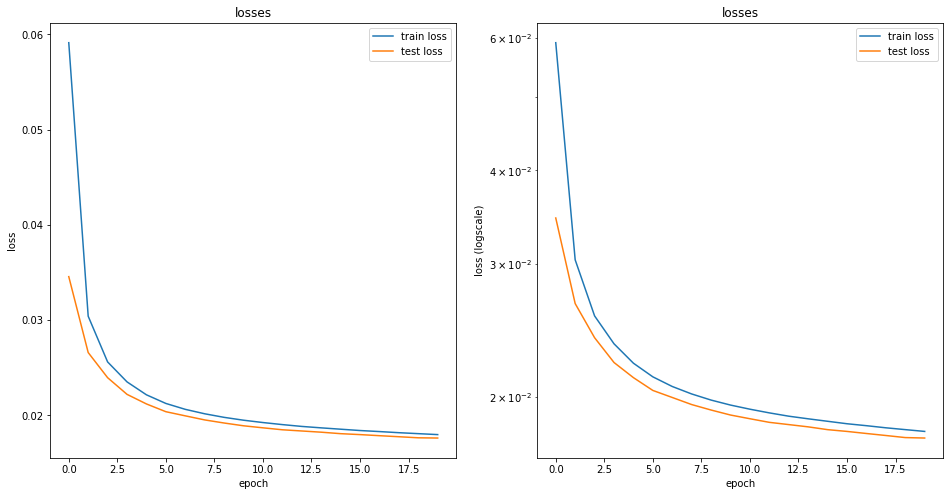

In [114]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))
axs[0].plot([entry['train loss'] for entry in history], label='train loss')
axs[0].plot([entry['test loss'] for entry in history], label='test loss')
axs[0].set_title('losses');
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].legend()

axs[1].semilogy([entry['train loss'] for entry in history], label='train loss')
axs[1].semilogy([entry['test loss'] for entry in history], label='test loss')
axs[1].set_title('losses');
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('loss (logscale)')
axs[1].legend()

## Results visualization

For inference on small samples, we can use CPU - it allows to not care about 'cuda' stuff. If the models or images are large, better stay with GPU.

In [127]:
autoencoder.to('cpu').eval();

In [128]:
def reconstruct_image(img, model):
    with torch.no_grad():
        return model(img.unsqueeze(0))[0]

In [129]:
img, target = mnist_test[0]
reconstruction = reconstruct_image(img, autoencoder)

In [130]:
autoencoder.cpu();

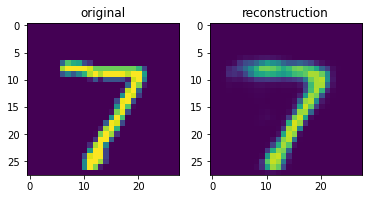

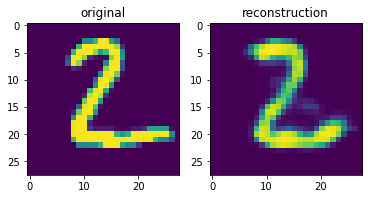

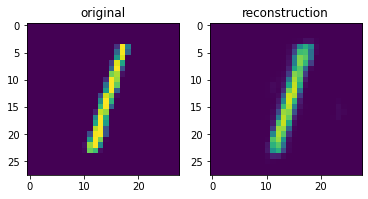

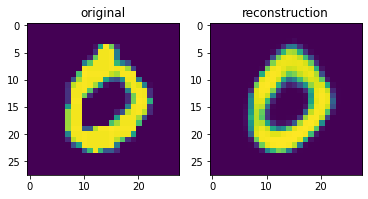

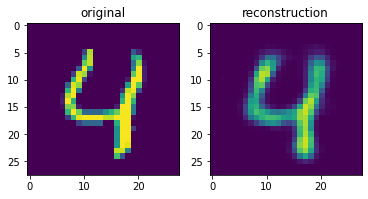

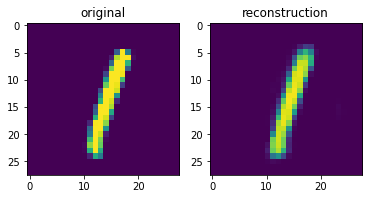

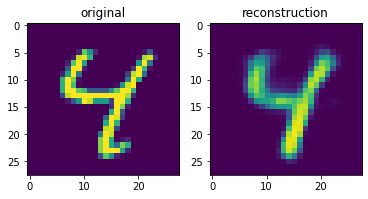

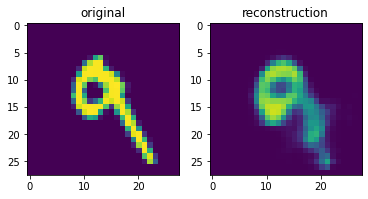

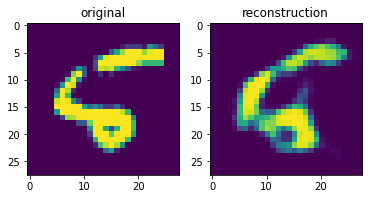

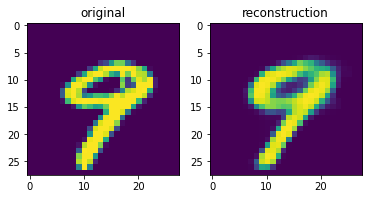

In [131]:
for i in range(10):
    img, target = mnist_test[i]
    reconstruction = reconstruct_image(img, autoencoder)
    fig, axs = plt.subplots(ncols=2)
    axs[0].imshow(img[0], vmin=0, vmax=1)
    axs[0].set_title('original')
    axs[1].imshow(reconstruction[0], vmin=0, vmax=1)
    axs[1].set_title('reconstruction')

## Reconstruction errors and outliers
Autoencores may be used to detect outliers. Rare events tend to be poorly reconstructed by the model

In [132]:
reconstruction_errors= []

# criterion gives us single loss for batch. Here the result is a vector of distances, one for each image
# equivalent to nn.functional.mse_loss(x, x_hat, reduction='none').sum(dim=(1,2,3))
def distance_function(x, x_hat):
    return torch.mean((x-x_hat)**2, dim=(1, 2, 3))

autoencoder.to(device);
for x, y in mnist_test_dataloader:
    x = x.to(device)
    x_hat = autoencoder(x.to(device))
    errors = distance_function(x, x_hat)
    reconstruction_errors.extend([el.item() for el in errors])

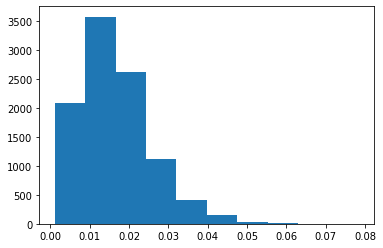

In [135]:
plt.hist(reconstruction_errors);

In [136]:
autoencoder.to('cpu');

Some of the worst cases..

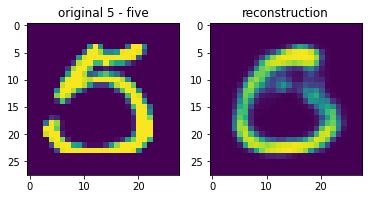

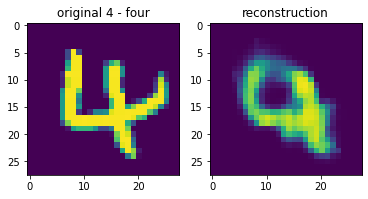

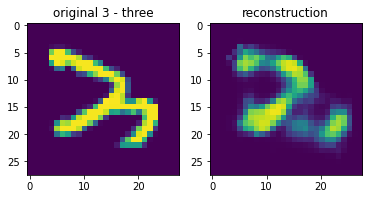

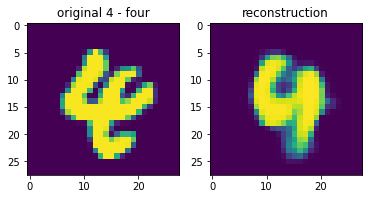

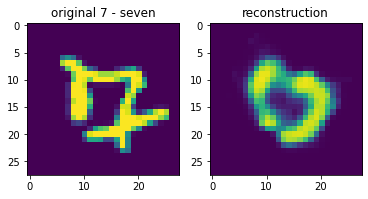

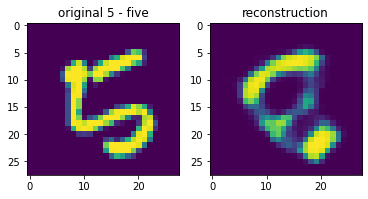

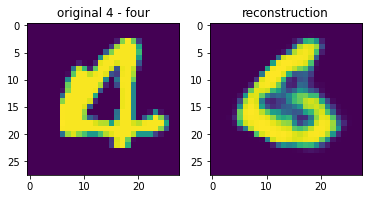

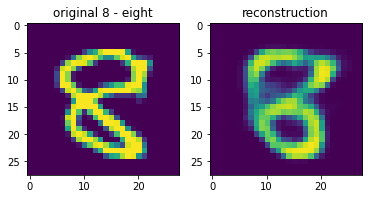

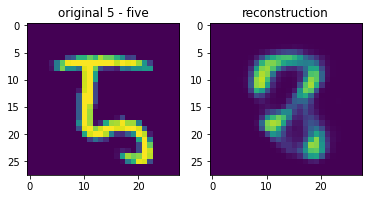

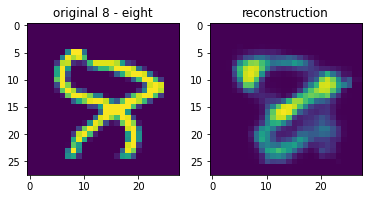

In [137]:
for idx in np.argsort(reconstruction_errors)[-10:]:
    img, target = mnist_test[idx]
    reconstruction = reconstruct_image(img, autoencoder)
    fig, axs = plt.subplots(ncols=2)
    axs[0].imshow(img[0], vmin=0, vmax=1)
    axs[0].set_title(f'original {mnist_test.classes[target]}')
    axs[1].imshow(reconstruction[0], vmin=0, vmax=1)
    axs[1].set_title('reconstruction')

In [138]:
labels = np.array([x[1] for x in mnist_test])

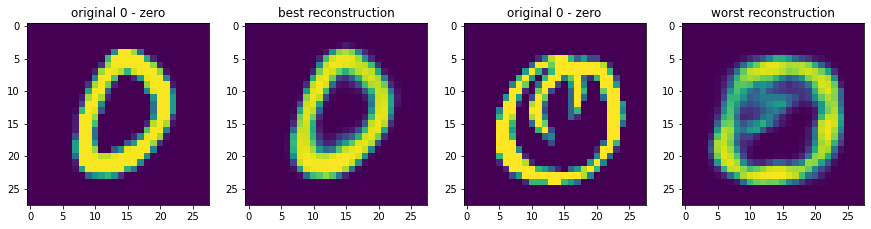

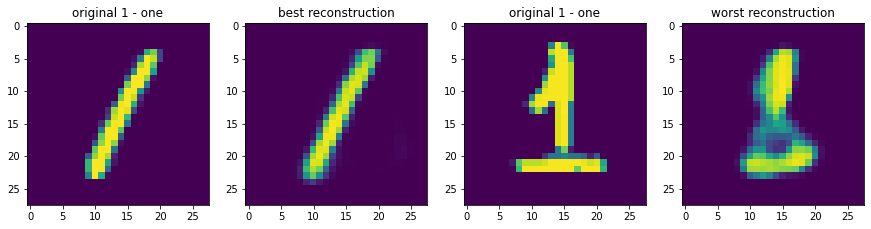

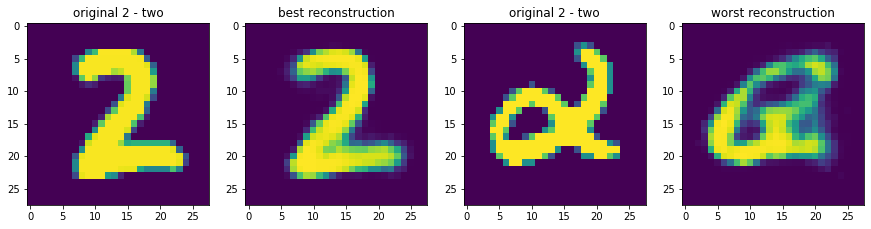

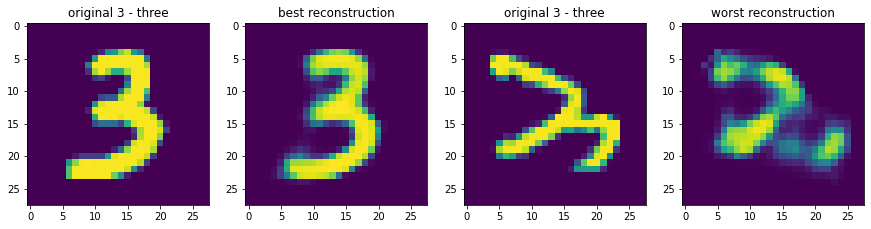

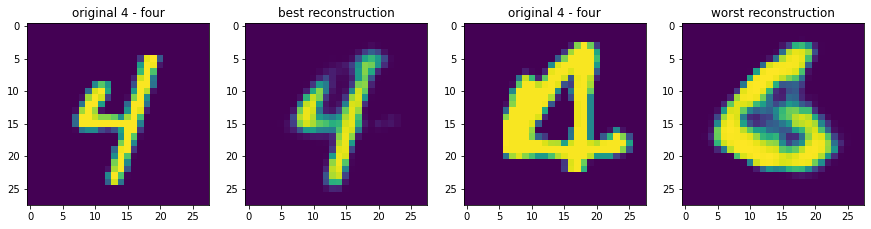

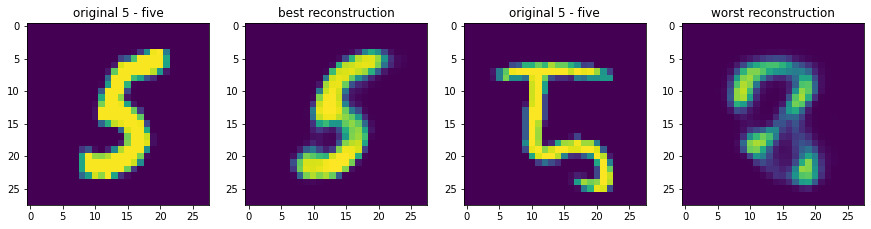

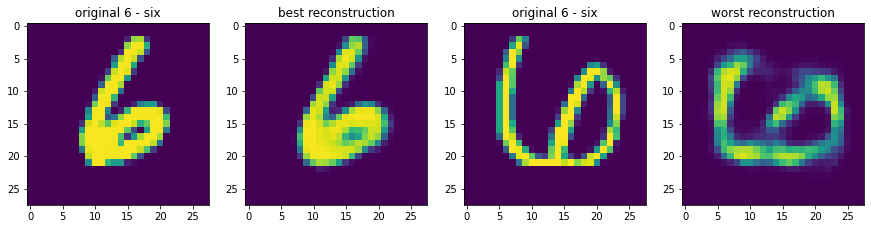

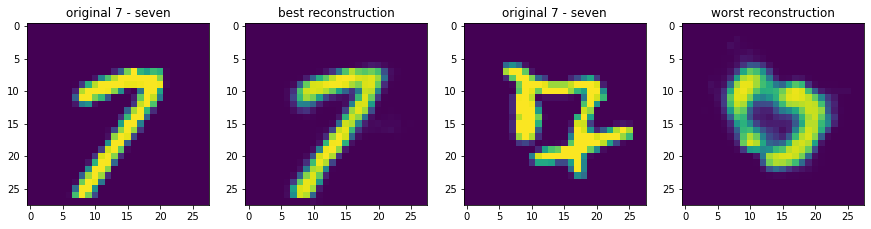

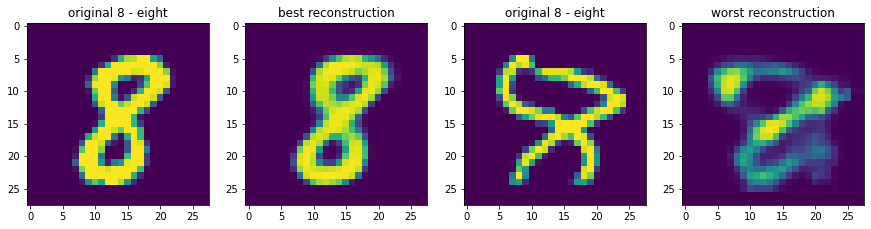

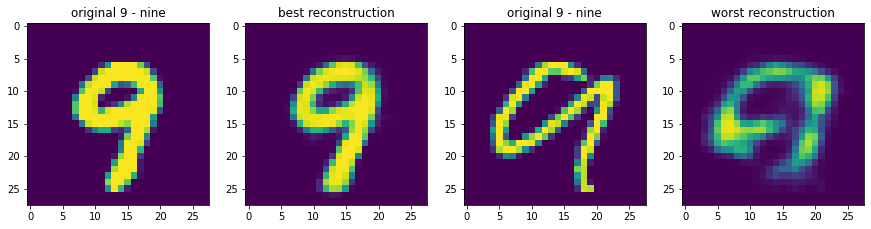

In [139]:
reconstruction_errors = np.array(reconstruction_errors)
for digit in range(10):
    digit_indices = np.where(labels==digit)[0]
    idx_best = digit_indices[np.argmin(reconstruction_errors[digit_indices])]
    idx_worst = digit_indices[np.argmax(reconstruction_errors[digit_indices])]
    fig, axs = plt.subplots(ncols=4, figsize=(15, 6))
    
    img, target = mnist_test[idx_best]
    reconstruction = reconstruct_image(img, autoencoder)
    axs[0].imshow(img[0], vmin=0, vmax=1)
    axs[0].set_title(f'original {mnist_test.classes[target]}')
    axs[1].imshow(reconstruction[0], vmin=0, vmax=1)
    axs[1].set_title('best reconstruction')
    
    img, target = mnist_test[idx_worst]
    reconstruction = reconstruct_image(img, autoencoder)
    axs[2].imshow(img[0], vmin=0, vmax=1)
    axs[2].set_title(f'original {mnist_test.classes[target]}')
    axs[3].imshow(reconstruction[0], vmin=0, vmax=1)
    axs[3].set_title('worst reconstruction')

## Task: Anomaly detection

Autoencoders are often used in anomaly detection. In such application, the model is train on 'normal' dataset, learning to  compressed representations typical objects. When feeding with untypical sample, the autoencoder is expected to reconstruct object much worse, therefore the reconstrution error should be much larger. 

Now we will try to distinguish letters from digits. For the letters sample we will use EMNIST is dataset (similar to MNIST, but apart from digits it contains letters). We intend to compare reconstruction errors on digits and letters.

In [140]:
from torchvision.datasets import EMNIST

In [141]:
emnist_test = EMNIST(DATASETS_PATH, split='letters', train=False, download=True, transform=transforms.ToTensor());
print(emnist_test.classes)

['N/A', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


Let's look at some letter examples:

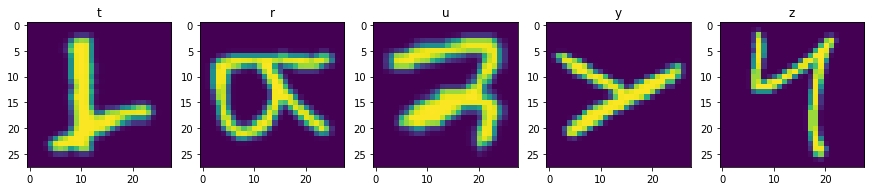

In [142]:
fig, axs = plt.subplots(ncols=5, figsize=(15,5))
for i, idx in enumerate(np.random.choice(np.arange(len(emnist_test)), 5)):
    img, target = emnist_test[idx]
    axs[i].imshow(img[0], vmin=0, vmax=1)
    axs[i].set_title(emnist_test.classes[target]);

As you, that the letters are rotated and mirrored. For out purpose it doesn't matter. If you care, use `img[0].T` for displaying or change dataset transform to `transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda img: img.transpose(1, 2))])`

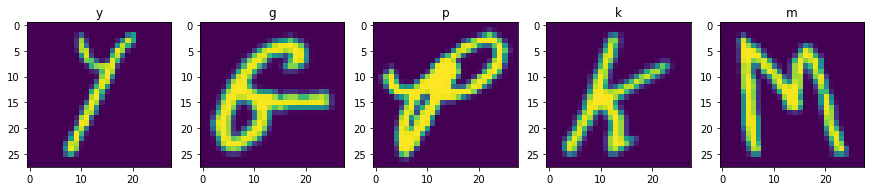

In [84]:
fig, axs = plt.subplots(ncols=5, figsize=(15,5))
for i, idx in enumerate(np.random.choice(np.arange(len(emnist_test)), 5)):
    img, target = emnist_test[idx]
    axs[i].imshow(img[0].T, vmin=0, vmax=1)
    axs[i].set_title(emnist_test.classes[target]);

In [143]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda img: img.transpose(1, 2))])
emnist_test = EMNIST(DATASETS_PATH, split='letters', train=False, download=True, transform=transform);

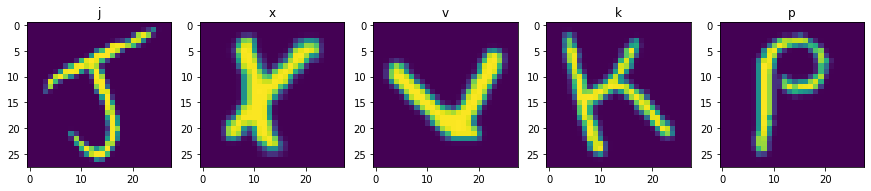

In [145]:
fig, axs = plt.subplots(ncols=5, figsize=(15,5))
for i, idx in enumerate(np.random.choice(np.arange(len(emnist_test)), 5)):
    img, target = emnist_test[idx]
    axs[i].imshow(img[0], vmin=0, vmax=1)
    axs[i].set_title(emnist_test.classes[target]);

#### Your task
Compute reconstruction errors for 1000 digits and 1000 letters.

In [85]:
def calc_reconstruction_error(x, model):
    # your code here
    # ...
    # reconstruction_error = ...
    return reconstruction_error

Tip: rember to use torch.no_grad() and set the same device for model and data

In [146]:
digit_indices = np.random.choice(np.arange(len(mnist_test)), 1000)
letter_indices = np.random.choice(np.arange(len(emnist_test)), 1000)

In [87]:
digits_reconstruction_errors= []
autoencoder = autoencoder.eval().to(device)
for idx in digit_indices:
    # your code here
    # ...
    # reconstruction_error = ...
    digits_reconstruction_errors.append(reconstruction_error)    

NameError: ignored

In [ ]:
letters_reconstruction_errors= []
# your code here

Solution:

In [147]:
criterion = nn.MSELoss()
@torch.no_grad()
def calc_reconstruction_error(x, model):
    x = x.unsqueeze(0).to(device)
    x_hat = model(x)
    reconstruction_error = criterion(x, x_hat).item()
    return reconstruction_error

# #you can also use numpy
# @torch.no_grad()
# def calc_reconstruction_error(x, model):
#     x_hat = model(x.unsqueeze(0).to(device))[0]
#     reconstruction_error = np.mean((x_hat.cpu().numpy() - x.cpu().numpy())**2)
#     return reconstruction_error

In [148]:
digits_reconstruction_errors= []
autoencoder = autoencoder.eval().to(device)
for idx in digit_indices:
    img, _ = mnist_test[idx]
    reconstruction_error = calc_reconstruction_error(img, autoencoder)
    digits_reconstruction_errors.append(reconstruction_error)    

In [149]:
letters_reconstruction_errors= []
autoencoder = autoencoder.eval().to(device)
for idx in letter_indices:
    img, _ = emnist_test[idx]
    reconstruction_error = calc_reconstruction_error(img, autoencoder)
    letters_reconstruction_errors.append(reconstruction_error)    

Visualize the results:

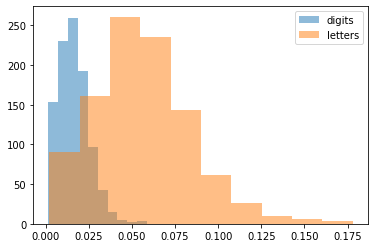

In [150]:
plt.hist(digits_reconstruction_errors, alpha=0.5, label='digits');
plt.hist(letters_reconstruction_errors, alpha=0.5, label='letters');
plt.legend();

Short analysis of result

In [151]:
import pandas as pd
from sklearn.metrics import precision_recall_curve, roc_auc_score

In [152]:
df = pd.DataFrame([{'class': 0, 'error': x} for x in digits_reconstruction_errors] + [{'class': 1, 'error': x} for x in letters_reconstruction_errors])
df.sample(10)

,class,error
1857,1,0.019872
786,0,0.012702
1316,1,0.064299
1141,1,0.113717
738,0,0.010066
1951,1,0.098177
1658,1,0.015394
1441,1,0.073124
957,0,0.011127
1207,1,0.006644


In [153]:
precision, recall, thresholds = precision_recall_curve(df['class'], df['error'])
rocauc = roc_auc_score(df['class'], df['error'])

Text(0.5, 1.0, 'Area under curve: 0.917')

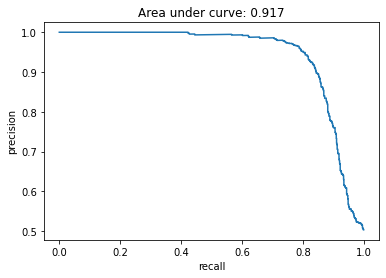

In [154]:
plt.plot(recall, precision)
plt.xlabel('recall');
plt.ylabel('precision');
plt.title(f'Area under curve: {rocauc:0.3f}')